# ModelBit Inference API service

Modelbit simplifies the whole experience of deploying models as REST API’s.

With just one line of code you can have a working REST API up and running within a minute.


(Free..30 Days)

<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/python/modelbit.png" width="900">

<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/python/modelbit1.gif" width="900">

In [1]:
!pip install modelbit -q
# Restart your Kernel after installing modelbit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.0/129.0 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 31.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 44.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 3.3 MB/s eta 0:00:00


In [2]:
import modelbit
mb = modelbit.login()

## Loans- Binary Classification

In [3]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/moezali1/modelbit/main/loans.csv')
df

,Applicant_ID,Age,Annual_Income,Credit_Score,Employment_Years,Loan_Amount_Requested,Default
0,10,32,82133,689,1,10789,No
1,38,30,53172,588,3,5442,Yes
2,6,31,90000,573,4,5000,Yes
3,15,29,74634,621,7,16074,Yes
4,35,36,78232,701,5,17742,No
...,...,...,...,...,...,...,...
4995,28,27,75641,634,4,5000,Yes
4996,36,27,63483,571,1,5000,Yes
4997,34,48,88626,722,10,25850,No
4998,28,36,90000,644,13,14923,No


# Exploratory Data Analysis

In [4]:
df.isnull().sum()

Applicant_ID             0
Age                      0
Annual_Income            0
Credit_Score             0
Employment_Years         0
Loan_Amount_Requested    0
Default                  0
dtype: int64

<Axes: xlabel='Default'>

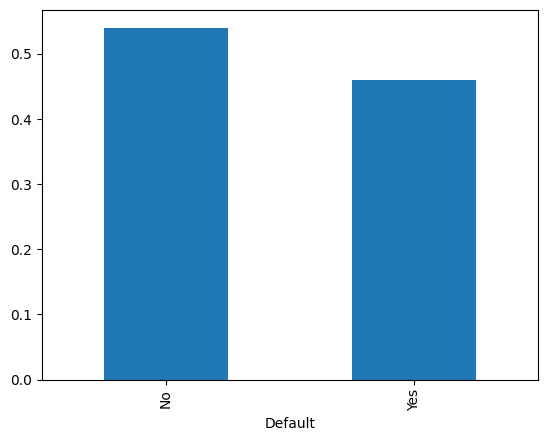

In [5]:
df['Default'].value_counts(normalize=True).plot.bar()

<Axes: >

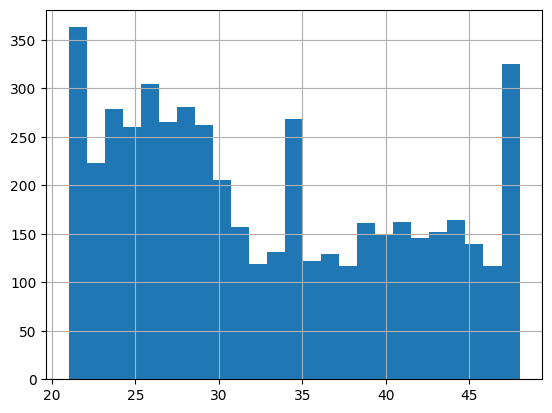

In [6]:
df['Age'].hist(bins=25)

<Axes: >

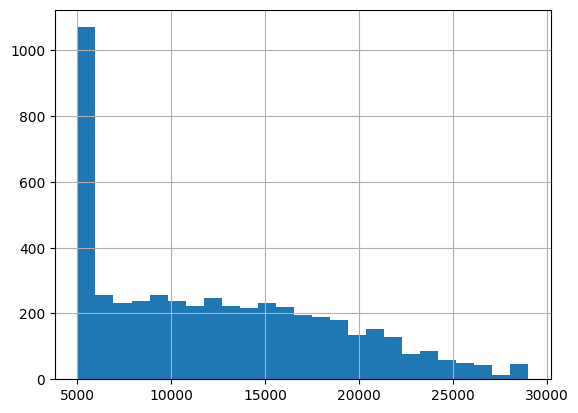

In [7]:
df['Loan_Amount_Requested'].hist(bins=25)

# Model/Pipeline Training and Selection

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import KBinsDiscretizer

# Features and target variable
X = df.drop(columns=['Default', 'Applicant_ID'])
y = df['Default']

# Columns to be scaled
numeric_features = ['Annual_Income', 'Credit_Score', 'Employment_Years', 'Loan_Amount_Requested']

# Column to be binned and one-hot encoded
categorical_features = ['Age']

# Create transformers
numeric_transformer = Pipeline([
                                ('imputer', SimpleImputer(strategy='median')),
                                ('scaler', MinMaxScaler())
                                ])

categorical_transformer = Pipeline([
                                    ('bin', KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='quantile')),
                                    ('encoder', OneHotEncoder(handle_unknown='ignore'))
                                   ])

# Combine all transformers into a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
                                                ('num', numeric_transformer, numeric_features),
                                                ('cat', categorical_transformer, categorical_features)
                                                ])

# Create and evaluate the pipeline
pipe = Pipeline([
                ('preprocessor', preprocessor),
                ('classifier', LogisticRegression()),
                ])

pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Annual_Income',
                                                   'Credit_Score',
                                                   'Employment_Years',
                                                   'Loan_Amount_Requested']),
                                                 ('cat',
                                                  Pipeline(steps=[('bin',
                                                                   KBinsDiscretizer(encode='ordinal',
                                                                                    n_bins=6)),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Age'])])),
                ('classifier', LogisticRegression())])

In [9]:
from sklearn.model_selection import train_test_split
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=667
                                                    )

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (3500, 5)
X_test: (1500, 5)
y_train: (3500,)
y_test: (1500,)


In [10]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Annual_Income',
                                                   'Credit_Score',
                                                   'Employment_Years',
                                                   'Loan_Amount_Requested']),
                                                 ('cat',
                                                  Pipeline(steps=[('bin',
                                                                   KBinsDiscretizer(encode='ordinal',
                                                                                    n_bins=6)),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Age'])])),
                ('classifier', LogisticRegression())])

In [11]:
y_pred = pipe.predict(X_test)
y_pred

array(['No', 'No', 'Yes', ..., 'Yes', 'No', 'No'], dtype=object)

In [12]:
y_pred_prob = pipe.predict_proba(X_test)[:, 1]
y_pred_prob

array([2.19358770e-04, 3.64347627e-01, 8.05709316e-01, ...,
       9.97130272e-01, 3.36422664e-02, 3.52602518e-04])

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9613333333333334

# Deployment Modelbit

In [14]:
import pandas as pd
import numpy as np

# first define function
def predict_loan_default(Age: int, Annual_Income: float, Credit_Score: int, Employment_Years: float, Loan_Amount_Requested: float)-> str:

    """
    Predict the probability of loan default using a pre-trained machine learning pipeline.

    Args:
        Age (int): Applicant's age.
        Annual_Income (float): Applicant's annual income.
        Credit_Score (int): Applicant's credit score.
        Employment_Years (float): Number of years employed.
        Loan_Amount_Requested (float): Requested loan amount.

    Returns:
        string: loan answer.
    """

    return pipe.predict(pd.DataFrame([[Age, Annual_Income, Credit_Score, Employment_Years, Loan_Amount_Requested]],
                                                columns = ['Age', 'Annual_Income', 'Credit_Score', 'Employment_Years', 'Loan_Amount_Requested']))

In [15]:
df.head(5)
# take the fisrt input

,Applicant_ID,Age,Annual_Income,Credit_Score,Employment_Years,Loan_Amount_Requested,Default
0,10,32,82133,689,1,10789,No
1,38,30,53172,588,3,5442,Yes
2,6,31,90000,573,4,5000,Yes
3,15,29,74634,621,7,16074,Yes
4,35,36,78232,701,5,17742,No


In [16]:
predict_loan_default(32, 821233, 689, 1, 10789)

array(['No'], dtype=object)

In [17]:
mb.deploy(predict_loan_default,name='test2')

In [ ]:
## wait one minute

# Call REST API Modelbit

## Prediction: No Default

## Prediction: Default

In [21]:
!curl -X POST "https://frenzfrenz.app.modelbit.com/v1/test/latest" -d "{\"data\": [30, 53172, 588, 3, 5442]}"

{"data":["Yes"]}

In [22]:
!curl -X POST "https://frenzfrenz.app.modelbit.com/v1/test/latest" -d "{\"data\": [32, 82133, 689, 1, 10789]}"

{"data":["No"]}

## Using JSON library

In [24]:
import requests

url = "https://frenzfrenz.app.modelbit.com/v1/test/latest"
headers = {'Content-Type': 'application/json'}

#value = [30, 53172, 588, 3, 5442] #yes
value = [32, 82133, 689, 1, 10789] #no
data = {"data": value}

response = requests.post(url, headers=headers, json=data)
if response.status_code == 200:
    response_json = response.json()
    result = response_json['data'][0]
else:
    print(f"Errore nella richiesta HTTP. Codice di stato: {response.status_code}")

result

'No'

## Inference Function

In [25]:
import requests

def predict_modelbit(url,input_list)-> str:
    "Function of inference"
    headers = {'Content-Type': 'application/json'}
    data = {"data": input_list}
    response = requests.post(url, headers=headers, json=data)
    if response.status_code == 200:
        response_json = response.json()
        result = response_json['data'][0]
        return result
    else:
        print(f"Errore nella richiesta HTTP. Codice di stato: {response.status_code}")

In [27]:
modelurl = "https://frenzfrenz.app.modelbit.com/v1/test/latest"
value_list = [30, 53172, 588, 3, 5442] #Yes
#value_list =  [32, 821233, 689, 1, 10789] #No

predict_modelbit(modelurl,value_list)

'Yes'

### Gradio App

In [28]:
!pip install gradio -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 42.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.9/91.9 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 55.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.2 MB/s

In [29]:
import gradio as gr
import requests
import ast


def predict_modelbit(url, input_list):
    "Function of inference"
    headers = {'Content-Type': 'application/json'}
    data = {"data": input_list}
    response = requests.post(url, headers=headers, json=data)
    if response.status_code == 200:
        response_json = response.json()
        result = response_json['data'][0]
        return result
    else:
        return f"Errore nella richiesta HTTP. Codice di stato: {response.status_code}"


def predict(input_list):
    input_list = ast.literal_eval(input_list)
    return predict_modelbit(modelurl, input_list)

modelurl = "https://frenzfrenz.app.modelbit.com/v1/test/latest"  #

input_interface = gr.Textbox(label="Input List (comma separated)")
output_interface = gr.Textbox(label="Prediction")

interface = gr.Interface(fn=predict,
                        inputs=input_interface,
                        outputs=output_interface,
                        title="ModelBit Predictor",
                        description="Enter a comma-separated list of inputs.",
                        allow_flagging ='never'
                        )

interface.launch()

#[32, 821233, 689, 1, 10789] #No
#[30, 53172, 588, 3, 5442] #Yes

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://3395d8fa9bd928de1b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
